# Dynamic Model of Segregation de Schelling - Python Implementation

## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

## Parametros

In [2]:
N = 60       # Grid will be N x N
EMPTY = 0.1  # Fraction of vacant properties
B_to_R = 1   # Ratio of blue to red people

## Inicialización Aleatoria

In [3]:
def rand_init(N, B_to_R, EMPTY):
    """ Random system initialisation.
    BLUE  =  0
    RED   =  1
    EMPTY = -1
    """
    vacant = int(N * N * EMPTY)
    population = N * N - vacant
    blues = int(population * 1 / (1 + 1/B_to_R))
    reds = population - blues
    M = np.zeros(N*N, dtype=np.int8)
    M[:reds] = 1
    M[-vacant:] = -1
    np.random.shuffle(M)
    return M.reshape(N,N)


M = rand_init(N, B_to_R, EMPTY)

In [4]:
cmap = plt.cm.colors.ListedColormap(['white','blue', 'red'])

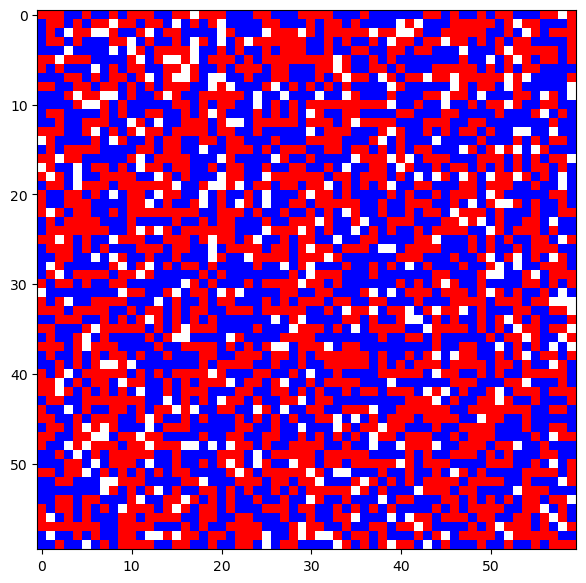

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.imshow(M, cmap = cmap)

## Modelo de Simulación Basado en Agente 

In [6]:
KERNEL = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]], dtype=np.int8)

In [7]:
from scipy.signal import convolve2d

def evolve(M, SIM_T, boundary='wrap'):
    """
    Args:
        M (numpy.array): the matrix to be evolved
        boundary (str): Either wrap, fill, or symm
    If the similarity ratio of neighbours
    to the entire neighbourhood population
    is lower than the SIM_T,
    then the individual moves to an empty house.
    """
    kws = dict(mode='same', boundary=boundary)
    B_neighs = convolve2d(M == 0, KERNEL, **kws)
    R_neighs = convolve2d(M == 1, KERNEL, **kws)
    Neighs   = convolve2d(M != -1,  KERNEL, **kws)

    B_dissatified = (B_neighs / Neighs < SIM_T) & (M == 0)
    R_dissatified = (R_neighs / Neighs < SIM_T) & (M == 1)
    M[R_dissatified | B_dissatified] = - 1
    vacant = (M == -1).sum()

    N_B_dissatified, N_R_dissatified = B_dissatified.sum(), R_dissatified.sum()
    filling = -np.ones(vacant, dtype=np.int8)
    filling[:N_B_dissatified] = 0
    filling[N_B_dissatified:N_B_dissatified + N_R_dissatified] = 1
    np.random.shuffle(filling)
    M[M==-1] = filling
   
    return M

In [8]:
P1 = np.copy(M)
P2 = np.copy(M)
P3 = np.copy(M)
P4 = np.copy(M)

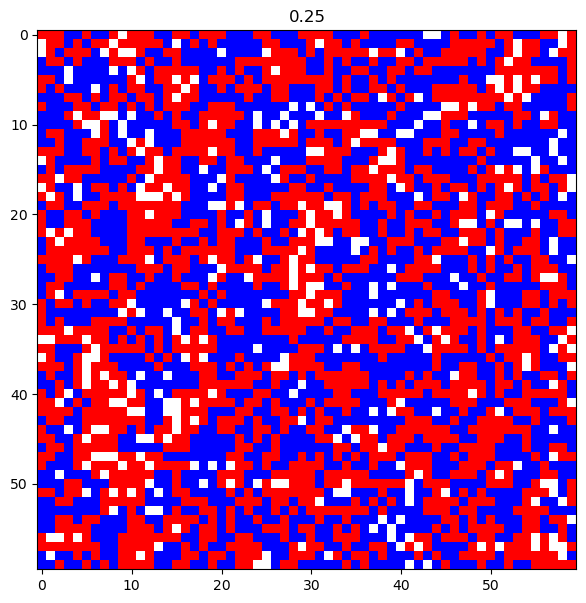

In [9]:
SIM_T = [0.25] # Similarity threshold (that is 1-τ)
for i in SIM_T:
    for k in range(0,1000):
        matrix1 = evolve(P1,i, boundary='wrap')
    plt.figure(figsize=(7,7))
    plt.imshow(matrix1, cmap = cmap)
    plt.title(str(i))

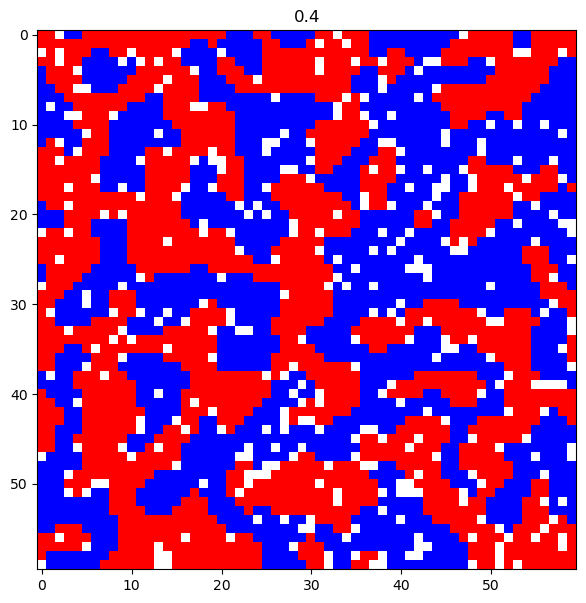

In [10]:
SIM_T = [0.4] # Similarity threshold (that is 1-τ)
for i in SIM_T:
    for k in range(0,1000):
        matrix2 = evolve(P2,i, boundary='wrap')
    plt.figure(figsize=(7,7))
    plt.imshow(matrix2, cmap = cmap)
    plt.title(str(i))

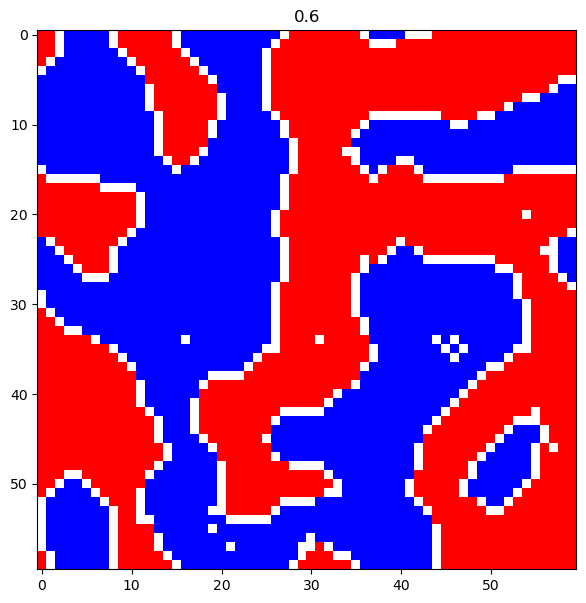

In [11]:
SIM_T = [0.60] # Similarity threshold (that is 1-τ)
for i in SIM_T:
    for k in range(0,1000):
        matrix3 = evolve(P3,i, boundary='wrap')
    plt.figure(figsize=(7,7))
    plt.imshow(matrix3,cmap = cmap)
    plt.title(str(i))

C:\Users\Usuario\AppData\Local\Temp\ipykernel_26504\1712506856.py:18: RuntimeWarning: invalid value encountered in divide
  B_dissatified = (B_neighs / Neighs < SIM_T) & (M == 0)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_26504\1712506856.py:19: RuntimeWarning: invalid value encountered in divide
  R_dissatified = (R_neighs / Neighs < SIM_T) & (M == 1)


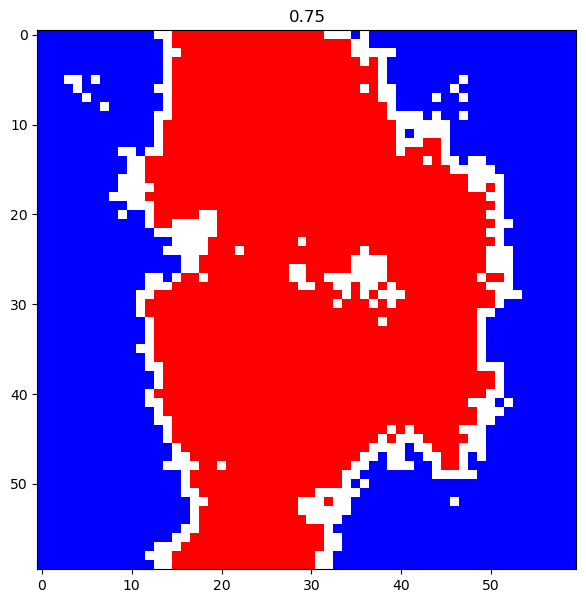

In [12]:
SIM_T = [0.75] # Similarity threshold (that is 1-τ)
for i in SIM_T:
    for k in range(0,1000):
        matrix4 = evolve(P4,i, boundary='wrap')
    plt.figure(figsize=(7,7))
    plt.imshow(matrix4,cmap = cmap)
    plt.title(str(i))

### Calculo satisfacción